# Outdated code - only kept because serves as a recovery file

Import and install neccesary libraries

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

Stock overview

In [2]:
stock_info = {
    'AAPL': 'Apple Inc.',
    'MSFT': 'Microsoft Corporation',
    'GOOGL': 'Alphabet Inc. (Google)',
    'AMZN': 'Amazon.com Inc.',
    'FB': 'Meta Platforms Inc. (Facebook)',
    'TSLA': 'Tesla Inc.',
    'JPM': 'JPMorgan Chase & Co.',
    'JNJ': 'Johnson & Johnson',
    'V': 'Visa Inc.',
    'PG': 'Procter & Gamble Co.',
    'NVDA': 'NVIDIA Corporation',
    'BRK-B': 'Berkshire Hathaway Inc.',
    'UNH': 'UnitedHealth Group Incorporated',
    'DIS': 'The Walt Disney Company',
    'MA': 'Mastercard Incorporated',
    'PYPL': 'PayPal Holdings Inc.',
    'HD': 'The Home Depot Inc.',
    'CMCSA': 'Comcast Corporation',
    'VZ': 'Verizon Communications Inc.',
    'INTC': 'Intel Corporation',
    'T': 'AT&T Inc.',
    'PFE': 'Pfizer Inc.',
    'MRK': 'Merck & Co. Inc.',
    'NFLX': 'Netflix Inc.',
    'PEP': 'PepsiCo Inc.',
    'WMT': 'Walmart Inc.',
    'CSCO': 'Cisco Systems Inc.',
    'ADBE': 'Adobe Inc.',
    'BAC': 'Bank of America Corporation',
    'KO': 'The Coca-Cola Company',
    'XOM': 'Exxon Mobil Corporation',
    'GOOG': 'Alphabet Inc. (Google)',
    'CRM': 'Salesforce.com Inc.',
    'ABBV': 'AbbVie Inc.',
    'NKE': 'NIKE Inc.',
    'ABT': 'Abbott Laboratories',
    'MO': 'Altria Group Inc.',
    'LLY': 'Eli Lilly and Company',
    'PEP': 'PepsiCo Inc.',
    'CVX': 'Chevron Corporation',
    'BA': 'The Boeing Company',
    'CAT': 'Caterpillar Inc.',
    'COST': 'Costco Wholesale Corporation',
}



Gather Historical Stock Data

In [3]:
# Function to fetch stock data
def fetch_stock_data(stock_symbol, start_date, end_date):
    stock_data = yf.download(stock_symbol, start=start_date, end=end_date)
    return stock_data.dropna()

Calculate Daily Returns and Simple Moving Average (SMA) and Exponential Moving Average (EMA)

In [4]:
# Function to calculate daily returns
def calculate_daily_returns(stock_data):
    stock_data['Daily_Return'] = stock_data['Adj Close'].pct_change()
    stock_data = stock_data.dropna()  # Remove rows with NaN values
    return stock_data

# Function to calculate Simple Moving Average (SMA) and Exponential Moving Average (EMA)
def calculate_sma_ema(stock_data, window):
    stock_data = stock_data.copy()  # Create a copy of the DataFrame to work on
    stock_data.loc[:, 'SMA'] = stock_data['Close'].rolling(window=window).mean()
    stock_data.loc[:, 'EMA'] = stock_data['Close'].ewm(span=window, adjust=False).mean()
    return stock_data.dropna()

Prepare Features and Target

In [5]:
# Function to prepare the data
def prepare_data(stock_data, num_days):
    X = []
    y = []
    
    for i in range(len(stock_data) - num_days):
        X.append(stock_data[['Daily_Return', 'SMA', 'EMA']].iloc[i:i+num_days].values.flatten())
        y.append(stock_data['Daily_Return'].iloc[i+num_days])
           
    return np.array(X), np.array(y)

Train and Evaluate Models - Linear Regression, Random Forest and ARIMA
- best model is based on the MSE and if they have the same one (very rare but happened once), we will choose the one with higher R2

In [6]:
# Function to train and evaluate machine learning models
def train_and_evaluate_models(X_train, y_train, X_test, y_test):
    models = {
        'Linear Regression': LinearRegression(),
        'Random Forest': RandomForestRegressor(),
    }
    
    best_model = None
    best_mse = float('inf')
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
            
        mse = mean_squared_error(y_test, y_pred)
        
        if mse < best_mse:
            best_mse = mse
            best_model = model
            print(f"Best Model: {name}")
    
    print(f"Best MSE: {best_mse}")
    
    return best_model



Visualize Predictions

In [7]:
# Function to visualize predictions and daily returns
def visualize_predictions(predicted_returns, date_labels, stock_symbol):
    plt.style.use('dark_background')  # Set the style to dark background
    fig, ax = plt.subplots(figsize=(12, 6))

    # Create the bar plot
    bars = ax.bar(date_labels, predicted_returns, label=f'{stock_symbol} Predicted Returns', color=np.random.rand(3,), edgecolor='grey')

    # Add title and labels
    ax.set_title(f'{stock_symbol} Predicted Stock Returns', color='white')
    ax.set_xlabel('Date', color='white')
    ax.set_ylabel('Predicted Returns', color='white')

    # Set the tick parameters to be white
    ax.tick_params(axis='both', colors='white')

    # Add grid and set its color to mild dark grey
    ax.grid(True, color='#555555')

    # Add legend with white text
    ax.legend(loc='upper left', frameon=True, facecolor='#363636', edgecolor='white', framealpha=1, fontsize=12, labelcolor='white')

    # Outline in mild dark grey
    for spine in ax.spines.values():
        spine.set_edgecolor('#555555')

    plt.show()


Main Function

[*********************100%***********************]  1 of 1 completed


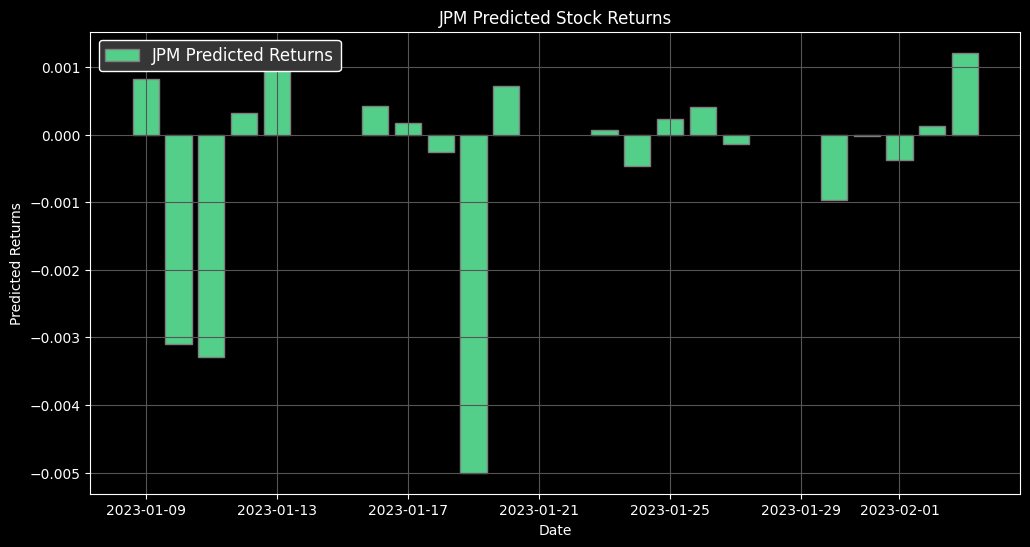

[*********************100%***********************]  1 of 1 completed


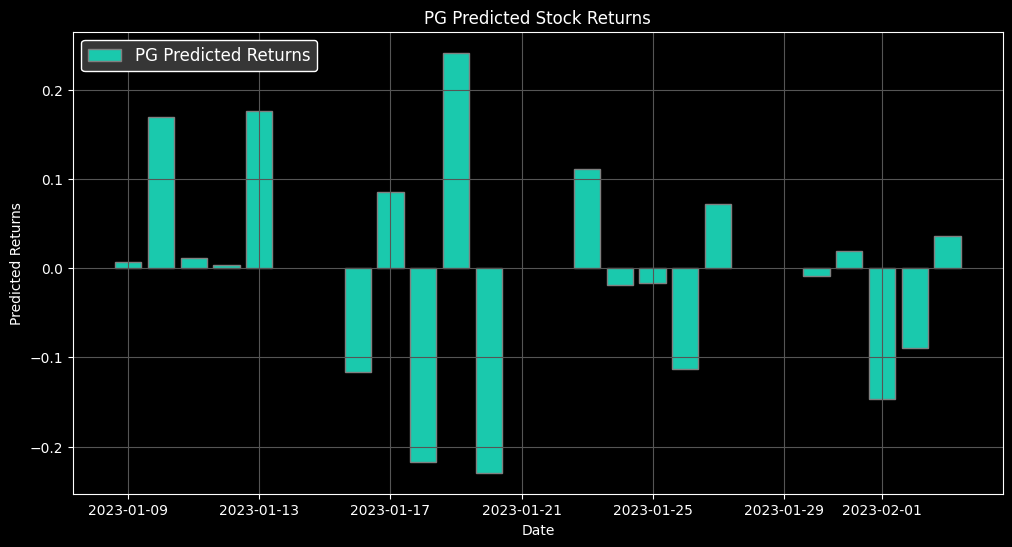

[*********************100%***********************]  1 of 1 completed


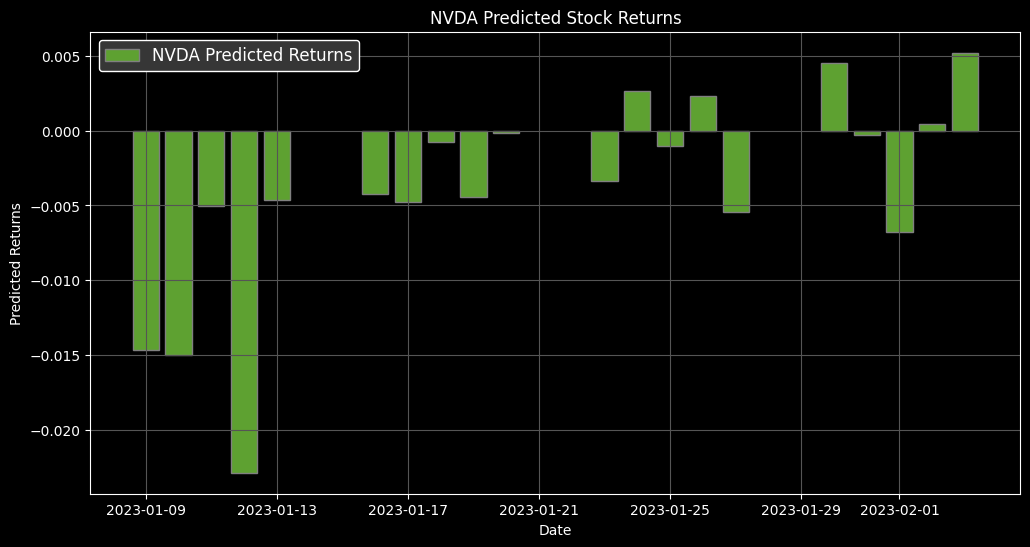

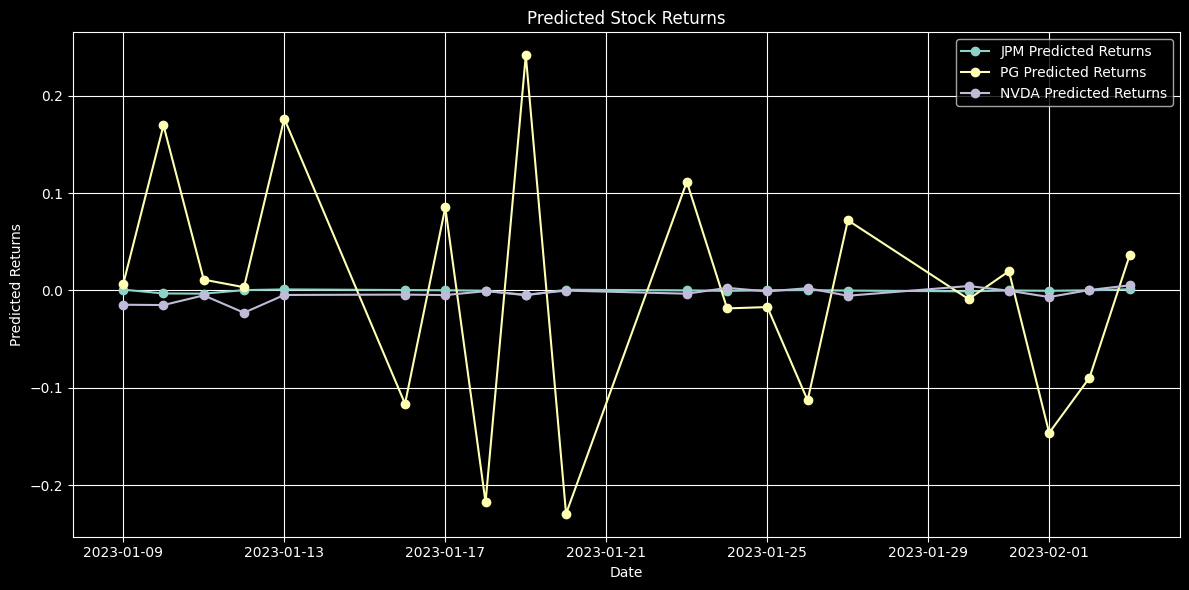

In [10]:
if __name__ == "__main__":
    stock_symbols = []
    for i in range(3):
        stock_symbol = input(f"Enter stock symbol {i+1} (or press Enter to stop): ")
        if not stock_symbol:
            break
        stock_symbols.append(stock_symbol)
    
    if not stock_symbols:
        print("No stock symbols provided. Exiting.")
        exit()

    
    num_days = input("Enter the number of days to forecast (1-60): ")
    end_date = input("Enter the start date (YYYY-MM-DD): ")
    
    try:
        num_days = int(num_days)
        if not (1 <= num_days <= 60):
            print("Invalid number of days. Please enter a value between 1 and 60.")
            exit()
    except ValueError:
        print("Invalid number of days. Please enter a valid number.")
        exit()

    start_date = "2010-01-01"

    predicted_returns_dict = {}

    for stock_symbol in stock_symbols:
        stock_data = fetch_stock_data(stock_symbol, start_date, end_date)
        
        if len(stock_data) <= num_days:
            print(f"Not enough data for stock symbol {stock_symbol}. Skipping.")
            continue
        
        daily_returns_data = calculate_daily_returns(stock_data)
        
        window = 20
        stock_data = calculate_sma_ema(daily_returns_data, window)
        
        X, y = prepare_data(stock_data, num_days)

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
        
        best_model = train_and_evaluate_models(X_train, y_train, X_test, y_test)
        
        last_week_data = X_test[-1].reshape(1, -1)
        
        predicted_returns = []

        for i in range(num_days):
            prediction = best_model.predict(last_week_data)
            predicted_returns.append(prediction[0])
            new_data_point = np.array([prediction[0], stock_data['SMA'].iloc[-num_days+i+1], stock_data['EMA'].iloc[-num_days+i+1]])
            last_week_data = np.roll(last_week_data, -3)
            last_week_data[0, -3:] = new_data_point

        last_date_in_data = stock_data.index[-1]
        prediction_dates = pd.date_range(start=last_date_in_data, periods=num_days+1, freq='B')[1:]  # Skip the first date to start from the next business day
        
        predicted_returns_dict[stock_symbol] = predicted_returns

        visualize_predictions(predicted_returns, prediction_dates, stock_symbol)

    plt.figure(figsize=(12, 6))

    for stock_symbol, predicted_returns in predicted_returns_dict.items():
        plt.plot(prediction_dates, predicted_returns, label=f'{stock_symbol} Predicted Returns', marker='o')

    plt.title('Predicted Stock Returns')
    plt.xlabel('Date')
    plt.ylabel('Predicted Returns')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


**Stock prediction - accumulation**

This is just a playing tool and not in the original code. A way of storing all the information about stock predictions in a histogram. Everytime the prediction is run, it can be stored in the histogram and over time accumulate the stock return predictions.

Data cleared.


/var/folders/04/7w96f6054nn3b4jcfrrz9k480000gn/T/ipykernel_22103/1456484907.py:41: UserWarning: genfromtxt: Empty input file: "predicted_returns.csv"
  return np.genfromtxt(filename, delimiter=',').tolist()


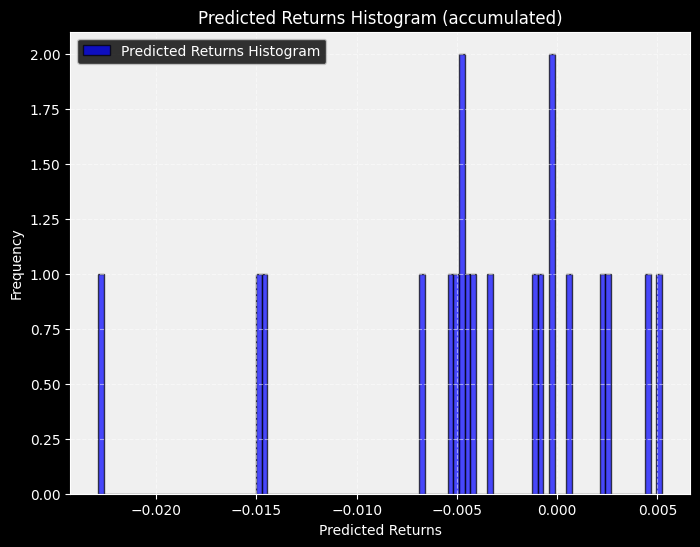

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import os

# Function to visualize the frequency histogram of predicted returns
def visualize_histogram(predicted_returns):
    plt.figure(figsize=(8, 6))

    # Calculate and plot the frequency histogram of predicted returns
    hist, bins, _ = plt.hist(
        predicted_returns, 
        bins=100, 
        alpha=0.7, 
        color='blue', 
        edgecolor='black',  # Add black outline
        label='Predicted Returns Histogram'
    )
    
    # Customize plot appearance
    plt.xlabel('Predicted Returns')
    plt.ylabel('Frequency')
    plt.title('Predicted Returns Histogram (accumulated)')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)  # Add gridlines
    
    # Set a darker background color
    ax = plt.gca()
    ax.set_facecolor('#F0F0F0')  # Light gray background
    
    # Show the histogram
    plt.show()


# Function to save and load accumulated predicted returns
def save_accumulated_returns(filename, predicted_returns):
    with open(filename, 'a') as file:
        np.savetxt(file, predicted_returns, delimiter=',')

def load_accumulated_returns(filename):
    try:
        return np.genfromtxt(filename, delimiter=',').tolist()
    except FileNotFoundError:
        return []

# Function to clear accumulated predicted returns
def clear_accumulated_returns(filename):
    choice = input("Do you want to clear the accumulated data? (y/n): ").strip().lower()
    if choice == 'y':
        with open(filename, 'w') as file:
            file.write('')
        print("Data cleared.")
        return True
    elif choice == 'n':
        print("Data not cleared.")
        return False
    else:
        print("Invalid choice. Please choose 'y' to clear or 'n' to cancel.")
        return False

# Main Function
if __name__ == "__main__":
    # Example: Generate some sample predicted returns data (replace with your data)
    predicted_returns_example = predicted_returns

    # Specify the filename for storing accumulated predicted returns
    filename = 'predicted_returns.csv'

    # Check if the file exists and if you want to clear the data
    if not predicted_returns_example:
        print("No predicted returns data to accumulate.")
    else:
        if not os.path.exists(filename):
            print("No existing data file found.")
        else:
            clear_choice = clear_accumulated_returns(filename)
            if clear_choice or not clear_choice:  # Check if data is cleared or 'n' is chosen
                # Load previously accumulated predicted returns
                predicted_returns_accumulated = load_accumulated_returns(filename)

                # Accumulate the predicted returns for later analysis
                predicted_returns_accumulated.extend(predicted_returns_example)

                # Save the accumulated predicted returns
                save_accumulated_returns(filename, predicted_returns_accumulated)

                # Visualize the histogram of accumulated predicted returns
                visualize_histogram(predicted_returns_accumulated)


-----------------------------------------------------
------------------------------------------------------

Backup for run_main.py file

In [ ]:
# Standard library imports
from datetime import datetime  # Data validation
import argparse  #Interface
import configparser  # Interface

# Third-party imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import yfinance as yf

# Import models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error


# Local application imports
from data_functions import (calculate_daily_returns, calculate_sma_ema,
                            fetch_stock_data, prepare_data,
                            train_and_evaluate_models, visualize_predictions)

# connecting run_main.py to config.ini
import configparser
config = configparser.ConfigParser()
config.read('config.ini')

# Reading visualization settings
viz_config = config['Visualization']

figure_size = tuple(map(int, viz_config['figure_size'].split(',')))
title = viz_config['title']
x_label = viz_config['x_label']
y_label = viz_config['y_label']
show_legend = viz_config.getboolean('show_legend')  # Automatically converts the ini string to a Python boolean
show_grid = viz_config.getboolean('show_grid') # Automatically converts the ini string to a Python boolean

#Popular stocks
stock_info = {
    'AAPL': 'Apple Inc.',
    'MSFT': 'Microsoft Corporation',
    'GOOGL': 'Alphabet Inc. (Google)',
    'AMZN': 'Amazon.com Inc.',
    'FB': 'Meta Platforms Inc. (Facebook)',
    'TSLA': 'Tesla Inc.',
    'JPM': 'JPMorgan Chase & Co.',
    'JNJ': 'Johnson & Johnson',
    'V': 'Visa Inc.',
    'PG': 'Procter & Gamble Co.',
    'NVDA': 'NVIDIA Corporation',
    'BRK-B': 'Berkshire Hathaway Inc.',
    'UNH': 'UnitedHealth Group Incorporated',
    'DIS': 'The Walt Disney Company',
    'MA': 'Mastercard Incorporated',
    'PYPL': 'PayPal Holdings Inc.',
    'HD': 'The Home Depot Inc.',
    'CMCSA': 'Comcast Corporation',
    'VZ': 'Verizon Communications Inc.',
    'INTC': 'Intel Corporation',
    'T': 'AT&T Inc.',
    'PFE': 'Pfizer Inc.',
    'MRK': 'Merck & Co. Inc.',
    'NFLX': 'Netflix Inc.',
    'PEP': 'PepsiCo Inc.',
    'WMT': 'Walmart Inc.',
    'CSCO': 'Cisco Systems Inc.',
    'ADBE': 'Adobe Inc.',
    'BAC': 'Bank of America Corporation',
    'KO': 'The Coca-Cola Company',
    'XOM': 'Exxon Mobil Corporation',
    'GOOG': 'Alphabet Inc. (Google)',
    'CRM': 'Salesforce.com Inc.',
    'ABBV': 'AbbVie Inc.',
    'NKE': 'NIKE Inc.',
    'ABT': 'Abbott Laboratories',
    'MO': 'Altria Group Inc.',
    'LLY': 'Eli Lilly and Company',
    'PEP': 'PepsiCo Inc.',
    'CVX': 'Chevron Corporation',
    'BA': 'The Boeing Company',
    'CAT': 'Caterpillar Inc.',
    'COST': 'Costco Wholesale Corporation',
}

#Interface parser
custom_help = """
Stock Prediction Tool

If you want to see the complete list of stocks available with the description, use the following code:
python run_main.py dummy --list-stocks --start-date dummy
"""

#Main function

if __name__ == "__main__":
    parser = argparse.ArgumentParser(description="Your custom help text", formatter_class=argparse.RawDescriptionHelpFormatter)

    parser.add_argument('stocks', nargs='+', type=str, help='Required stock symbol(s)')
    parser.add_argument('--start-date', type=str, required=True, help='Start date for prediction (YYYY-MM-DD), please input no earlier date than 2010-01-01')
    parser.add_argument('--num-days', type=int, default=5, help='Number of days to predict (choose a number between 1-60) - doesnt display weekends')
    parser.add_argument('--list-stocks', action='store_true', help='List available stocks and exit')

    args = parser.parse_args()

    if args.list_stocks:
        for symbol, description in stock_info.items():
            print(f"{symbol}: {description}")
        exit(0)

    stock_symbols = args.stocks
    num_days = args.num_days
    end_date_str = args.start_date 
    
    # Validate selected stocks
    
    for stock_symbol in stock_symbols:
        if stock_symbol not in stock_info:
            print(f"Invalid stock symbol: {stock_symbol}")
            exit(1)

    # Error message if incorrect stock symbol was given
    
    if not stock_symbols:
        print("No stock symbols provided. Exiting.")
        exit()
    
    try:
        num_days = int(num_days)
        if not (1 <= num_days <= 60):
            print("Invalid number of days. Please enter a value between 1 and 60.")
            exit()
    except ValueError:
        print("Invalid number of days. Please enter a valid number.")
        exit()
    
    start_date_str = config['DEFAULT']['start_date']
    start_date = datetime.strptime(start_date_str, '%Y-%m-%d')
    predicted_returns_dict = {}
    
    #Validate if correct date was given
    
    try:
        end_date = datetime.strptime(end_date_str, '%Y-%m-%d')
    except ValueError:
        print("Invalid date format. Please enter a date in the format YYYY-MM-DD.")
        exit(1)

    # Check if the end_date is after config date
    
    if end_date < start_date:
        print(f"Start date for prediction should be no earlier than {start_date}.")
        exit(1)
        
    # Stock data fetching

    for stock_symbol in stock_symbols:
        stock_data = fetch_stock_data(stock_symbol, start_date, end_date)
        
        if len(stock_data) <= num_days:
            print(f"Not enough data for stock symbol {stock_symbol}. Skipping.")
            continue
        
        # Model training and performance comparison
        
        daily_returns_data = calculate_daily_returns(stock_data)
        window = int(config['DEFAULT']['window_MA'])
        stock_data = calculate_sma_ema(daily_returns_data, window)
        X, y = prepare_data(stock_data, num_days)

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False) # Shuffle false as the order is important
        best_model = train_and_evaluate_models(X_train, y_train, X_test, y_test)
        last_week_data = X_test[-1].reshape(1, -1)
        predicted_returns = []

        for i in range(num_days):
            prediction = best_model.predict(last_week_data)
            predicted_returns.append(prediction[0])
            new_data_point = np.array([prediction[0], stock_data['SMA'].iloc[-num_days+i+1], stock_data['EMA'].iloc[-num_days+i+1]])
            last_week_data = np.roll(last_week_data, -3)
            last_week_data[0, -3:] = new_data_point

        last_date_in_data = stock_data.index[-1]
        prediction_dates = pd.date_range(start=last_date_in_data, periods=num_days+1, freq='B')[1:] 
        predicted_returns_dict[stock_symbol] = predicted_returns
        print(f"Best performing model for the given stock is {best_model}.")
        
        # Visualization of predicted returns
        
        visualize_predictions(predicted_returns, prediction_dates, stock_symbol)

    plt.figure(figsize=figure_size)

    for stock_symbol, predicted_returns in predicted_returns_dict.items():
        plt.plot(prediction_dates, predicted_returns, label=f'{stock_symbol} Predicted Returns', marker='o')

    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    if show_legend:
        plt.legend()

    if show_grid:
        plt.grid() 
        
    plt.show()    

#end of code